# CE Fit for O-Pt(111)

In [1]:
# %run ./zacros_functions.ipynb
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import zacros_functions as zf

## Cluster Expansion Energy Fitting

### Create Zacros input for CE fit

In [2]:
# Path to Zacros executables
zacros_path = Path("/home/akandra/zacros/zacros_4.0/build")
zacros3_path = Path("/home/akandra/zacros/zacros_3.03/build_std")

# Path to data
path_to_Dropbox = Path("/mnt/c/Users/akandra/Dropbox/")
path_to_data = path_to_Dropbox / "Surface_Reaction_Kinetics/O_Pt111/"

df = zf.get_dft_data(Path(path_to_data / "DFT_data"))

dfsel = df[(df['functional']=='RPBE') & 
           (df['system']=='Pt(111)')]

Eref_slab = dfsel[(dfsel['cell_size']=='8x8') & (dfsel['kpoints']=='kp221')].slab_energy.values[0]
Eref_1O   = dfsel[  (dfsel['cell_size']=='8x8') 
                  & (dfsel['kpoints']=='kp221')  
                  & (dfsel['adsorbates'].apply(lambda x: len(x)==1))].energy.values[0]
Eref = Eref_1O - Eref_slab
print(f"Eref = {Eref:.4f} eV")

Eref = -5.7913 eV


## CE energy for 8x8 lattice 2-body

Directory /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body already exists. Please remove it or choose a different name.


,path,system,cell_size,kpoints,functional,adsorbates,energy,slab_energy
108,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,[0],-1333.927205,-1328.135895
120,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 8]",-1339.595074,-1328.135895
125,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 9]",-1339.689154,-1328.135895
109,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 16]",-1339.728599,-1328.135895
112,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 17]",-1339.695553,-1328.135895
113,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 18]",-1339.703630,-1328.135895
114,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 24]",-1339.695587,-1328.135895
116,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 25]",-1339.702166,-1328.135895
117,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 27]",-1339.704599,-1328.135895
118,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 32]",-1339.688380,-1328.135895


Configuration 1 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body/Conf1
Configuration 2 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body/Conf2
Configuration 3 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body/Conf3
Configuration 4 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body/Conf4
Configuration 5 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body/Conf5
Configuration 6 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body/Conf6
Configuration 7 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body/Conf7
Configuration 8 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_8x8_2body/Conf8
Configuration 9 created in /mnt/c/Users/akandra/Dropbox/Surface_

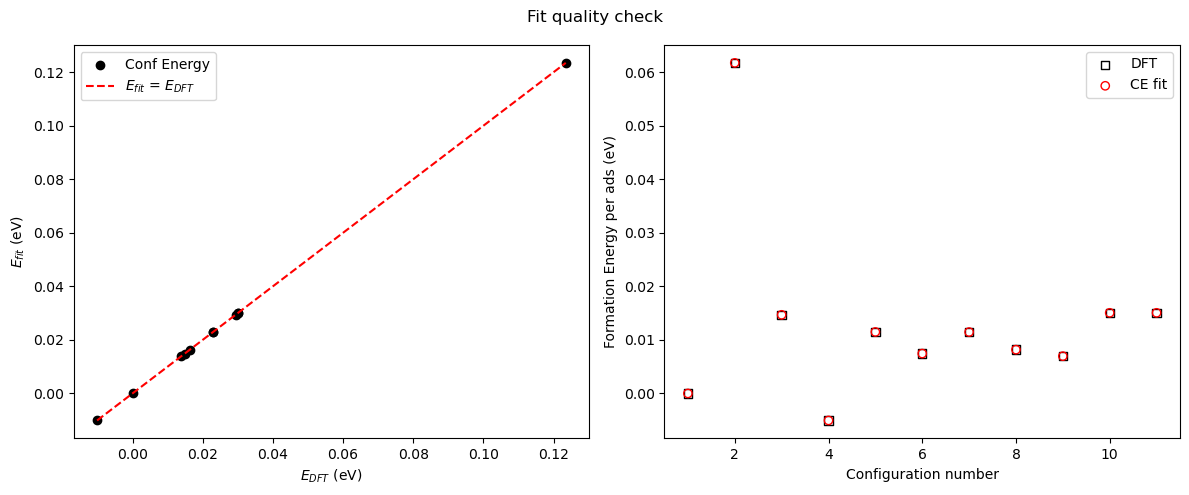

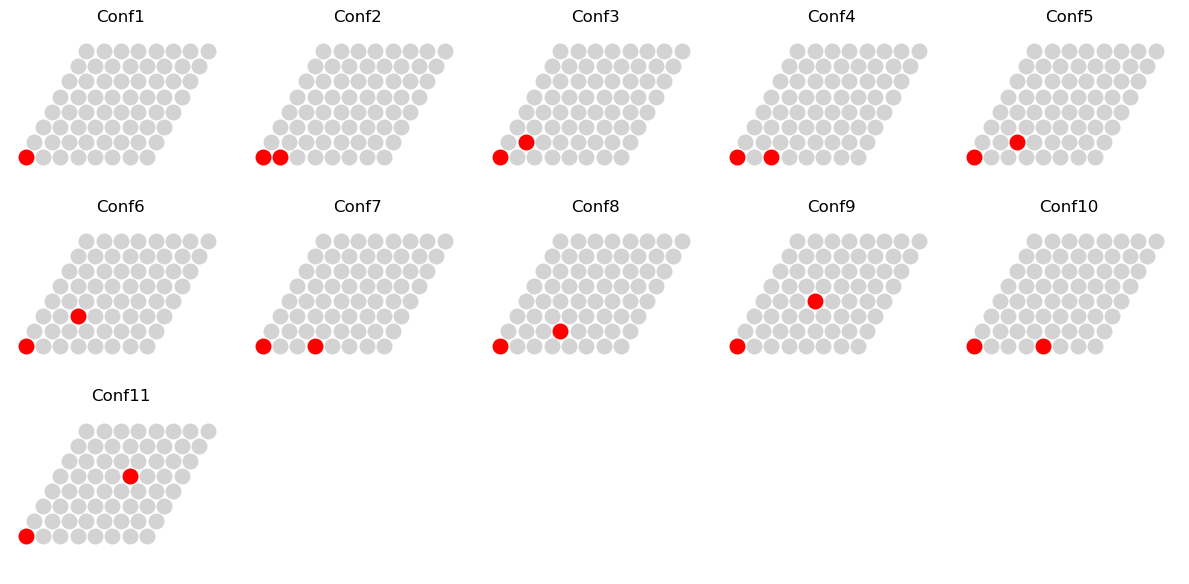

In [ ]:
# Setting up a system 

# Directory
cefit_dir = path_to_data / "cefit"
cefit_dir.mkdir(exist_ok=True)

wdir = cefit_dir / "test_8x8_2body"
try:
    Path(wdir).mkdir(exist_ok= False)

except FileExistsError:
    print(f"Directory {wdir} already exists. Please remove it or choose a different name.")
    exit(1)

# DFT data
dfz = dfsel[(dfsel['cell_size']=='8x8') & (dfsel['kpoints']=='kp221') 
                   &(dfsel['adsorbates'].apply(lambda x: len(x)<3))
                  ].iloc[:].sort_values(by='adsorbates')
#ids = [75]
#dfz = dfsel.loc[ids]
display(dfz)
# lattice size
Nx_lat = 8
Ny_lat = 8

# Clusters to be used
shell_list = [0,1,2,3,4,5,6,7,8,9]

# Produce the fit
E_form, E_fit = zf.produce_fit(wdir, dfz, Nx_lat, Ny_lat, shell_list, Eref, zacros_path)
# Show input configurations
zf.plot_state_ce(wdir, reps=None, show_axes = False, show_sites_ids=False, file_name=None, titles=None, figsize=(12,6), ncols=5, sf=2)
# Get the fit results
ce_names_8, ce_coeffs_8, ce_nads_8 = zf.get_cefit_output(wdir)

## CE energy for 16x16 lattice 2-body

Directory /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body already exists. Please remove it or choose a different name.


,path,system,cell_size,kpoints,functional,adsorbates,energy,slab_energy
108,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,[0],-1333.927205,-1328.135895
120,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 8]",-1339.595074,-1328.135895
125,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 9]",-1339.689154,-1328.135895
109,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 16]",-1339.728599,-1328.135895
112,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 17]",-1339.695553,-1328.135895
113,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 18]",-1339.703630,-1328.135895
114,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 24]",-1339.695587,-1328.135895
116,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 25]",-1339.702166,-1328.135895
117,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 27]",-1339.704599,-1328.135895
118,/mnt/c/Users/akandra/Dropbox/Surface_Reaction_...,Pt(111),8x8,kp221,RPBE,"[0, 32]",-1339.688380,-1328.135895


Configuration 1 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body/Conf1
Configuration 2 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body/Conf2
Configuration 3 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body/Conf3
Configuration 4 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body/Conf4
Configuration 5 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body/Conf5
Configuration 6 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body/Conf6
Configuration 7 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body/Conf7
Configuration 8 created in /mnt/c/Users/akandra/Dropbox/Surface_Reaction_Kinetics/O_Pt111/cefit/test_16x16_2body/Conf8
Configuration 9 created in /mnt/c/Users/akandra/

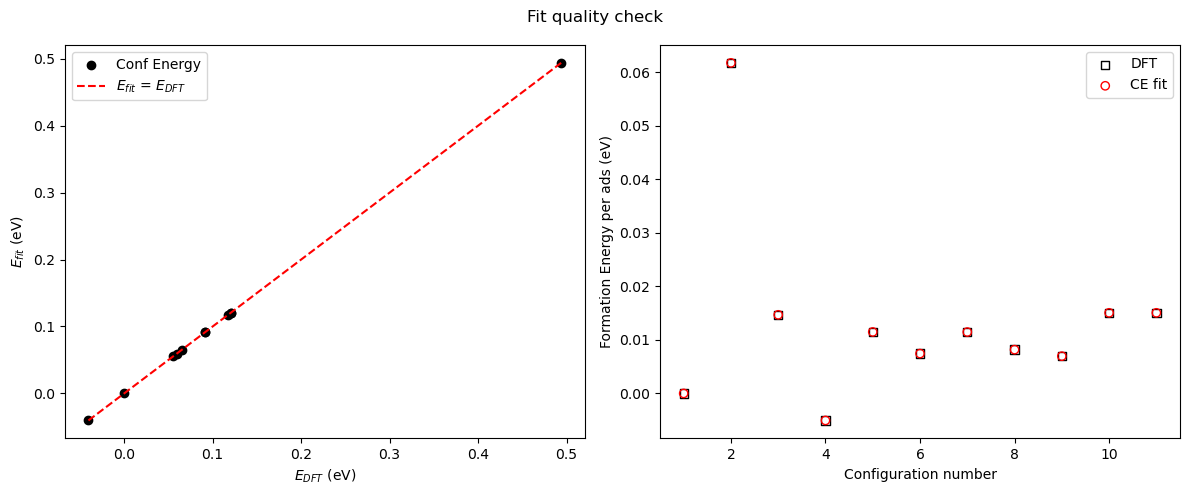

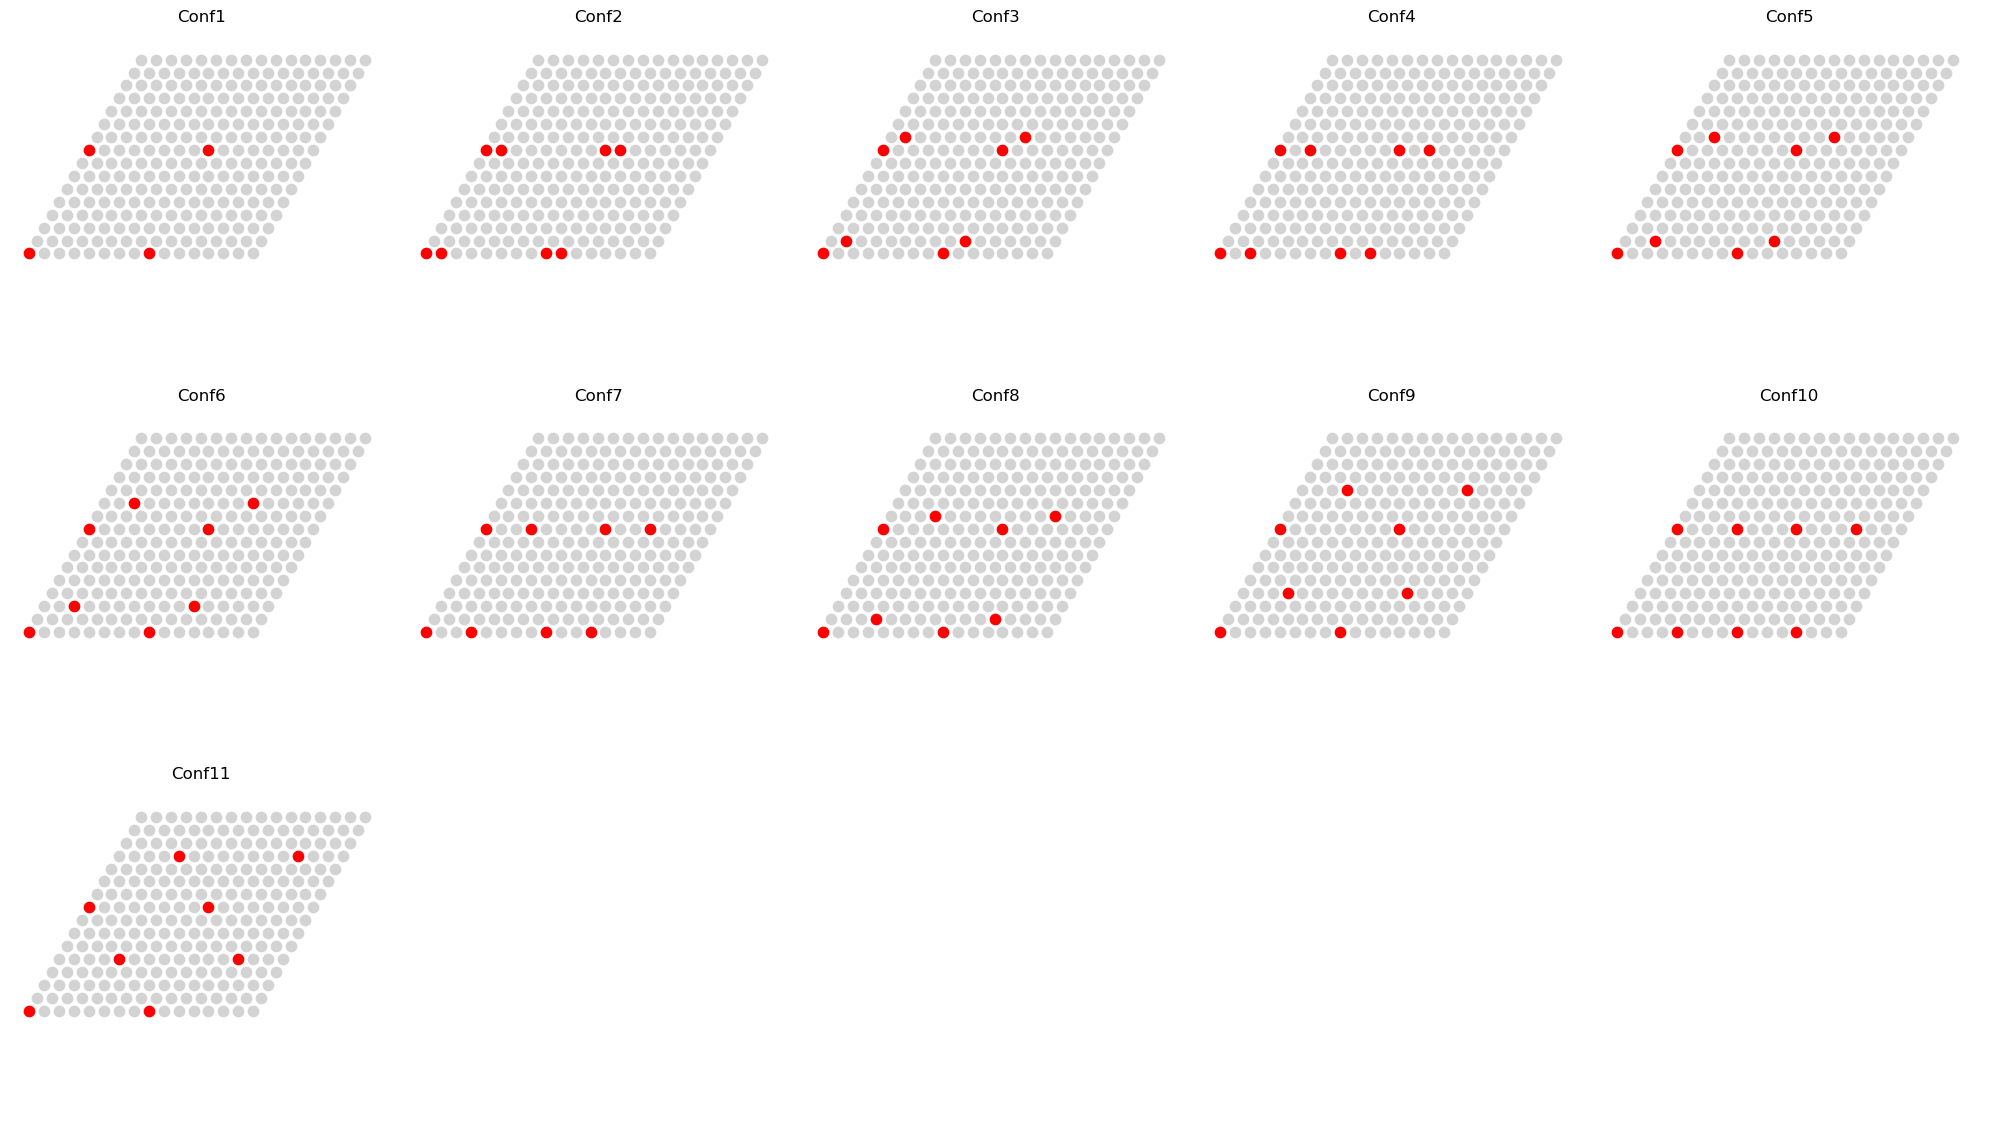

In [17]:
# Setting up a system 

# Directory
cefit_dir = path_to_data / "cefit"
cefit_dir.mkdir(exist_ok=True)

wdir = cefit_dir / "test_16x16_2body"
try:
    Path(wdir).mkdir(exist_ok= False)

except FileExistsError:
    print(f"Directory {wdir} already exists. Please remove it or choose a different name.")
    exit(1)

# DFT data
dfz = dfsel[(dfsel['cell_size']=='8x8') & (dfsel['kpoints']=='kp221') 
                   &(dfsel['adsorbates'].apply(lambda x: len(x)<3))
                  ].iloc[:].sort_values(by='adsorbates')
#ids = [75]
#dfz = dfsel.loc[ids]
display(dfz)

# lattice size
Nx_lat = 16
Ny_lat = 16

# Clusters to be used
shell_list = [0,1,2,3,4,5,6,7,8,9]

# Produce the fit
E_form, E_fit = zf.produce_fit(wdir, dfz, Nx_lat, Ny_lat, shell_list, Eref, zacros_path)
# Show input configurations
zf.plot_state_ce(wdir, reps=None, show_axes = False, show_sites_ids=False, file_name=None, titles=None, figsize=(20,12), ncols=5, sf=2)
# Get the fit results
ce_names_16, ce_coeffs_16, ce_nads_16 = zf.get_cefit_output(wdir)

Names of the clusters are the same
Multi-body contributions are the same


Text(0, 0.5, '$c_8/c_{16}$')

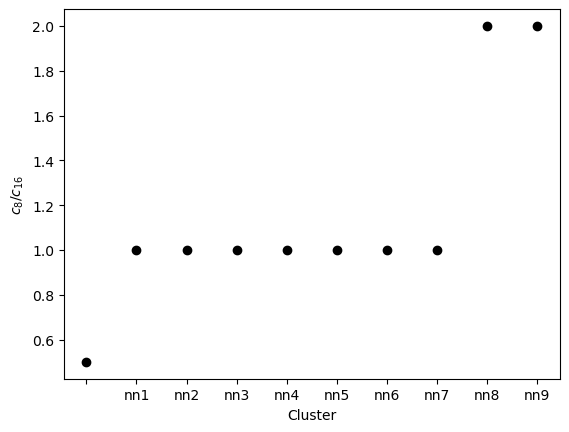

In [32]:
# Compare replicated and non replicated cases
if ce_names_16 == ce_names_8: print('Names of the clusters are the same')
if ce_nads_16 == ce_nads_8: print('Multi-body contributions are the same')
fig, axis = plt.subplots()
axis.scatter([ n[6:] for n in ce_names_8],np.array(ce_coeffs_8)/np.array(ce_coeffs_16), color='k' )
axis.set_xlabel('Cluster')
axis.set_ylabel(r'$c_8/c_{16}$')